# importing the libraries

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pip install -q keras

In [ ]:
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# loading the directories 

In [ ]:
# loading the directories 
training_dir = '/content/drive/MyDrive/Strokefaces/Traning Set'
validation_dir = '/content/drive/MyDrive/Strokefaces/Validation Set'
test_dir = '/content/drive/MyDrive/Strokefaces/Test Set'

In [ ]:
# useful for getting number of files
image_files = glob(training_dir + '/*/*.jp*g')
valid_image_files = glob(validation_dir + '/*/*.jp*g')
valid_image_files2 = glob(test_dir + '/*/*.jp*g')

In [ ]:
# getting the number of classes i.e. type of fruits
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 2


In [ ]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16
#from keras.preprocessing import image

IMAGE_SIZE = [224, 224]

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Image Augmentation

In [ ]:
# Image Augmentation

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

training_generator = training_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = IMAGE_SIZE, batch_size = 20, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = IMAGE_SIZE, batch_size = 20, shuffle=False, class_mode='categorical', subset='validation')


Found 2132 images belonging to 2 classes.
Found 318 images belonging to 2 classes.
Found 93 images belonging to 2 classes.


In [ ]:
# The labels are stored in class_indices in dictionary form. 
# checking the labels
training_generator.class_indices

{'Normalface': 0, 'Strokeface': 1}

In [ ]:

history = model.fit(training_generator, epochs=10, validation_data=validation_generator) 

Epoch 1/10
11/11 [==============================] - 37s 3s/step - loss: 0.3402 - accuracy: 0.8344 - val_loss: 0.0909 - val_accuracy: 0.9591
Epoch 2/10
11/11 [==============================] - 35s 3s/step - loss: 0.1000 - accuracy: 0.9662 - val_loss: 0.0513 - val_accuracy: 0.9874
Epoch 3/10
11/11 [==============================] - 35s 3s/step - loss: 0.0634 - accuracy: 0.9742 - val_loss: 0.0569 - val_accuracy: 0.9906
Epoch 4/10
11/11 [==============================] - 36s 3s/step - loss: 0.0474 - accuracy: 0.9836 - val_loss: 0.0416 - val_accuracy: 0.9906
Epoch 5/10
11/11 [==============================] - 35s 3s/step - loss: 0.0409 - accuracy: 0.9850 - val_loss: 0.0381 - val_accuracy: 0.9937
Epoch 6/10
11/11 [==============================] - 36s 3s/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0481 - val_accuracy: 0.9906
Epoch 7/10
11/11 [==============================] - 36s 3s/step - loss: 0.0303 - accuracy: 0.9925 - val_loss: 0.0364 - val_accuracy: 0.9906
Epoch 8/10
11/11 [==

### **Result**

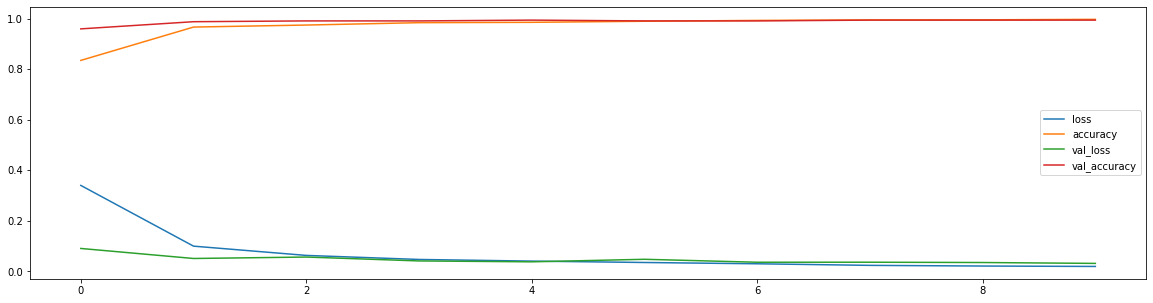

In [ ]:
pd.DataFrame(history.history).plot(figsize=(20,5))
plt.show()

In [ ]:
scores = model.evaluate(test_generator)
print(" Test Accuracy = ", scores[1])

5/5 [==============================] - 27s 7s/step - loss: 0.0188 - accuracy: 0.9892
 Test Accuracy =  0.9892473220825195
